<a href="https://colab.research.google.com/github/369koushil/ML_algos/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# %pip install ucimlrepo

In [41]:
import numpy as np
import pandas as pd

In [42]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)

# data (as pandas dataframes)
X = optical_recognition_of_handwritten_digits.data.features
y = optical_recognition_of_handwritten_digits.data.targets

In [43]:
df=pd.concat([X,y],axis=1)

In [44]:
df.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute56,Attribute57,Attribute58,Attribute59,Attribute60,Attribute61,Attribute62,Attribute63,Attribute64,class
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

train_mean = x_train.mean(axis=0)
x_train_centered = x_train - train_mean
x_test_centered = x_test - train_mean

cov_mat = np.cov(x_train_centered, rowvar=False)
eigen_values, eigen_vectors = np.linalg.eig(cov_mat)

In [48]:
k=20
sorted_idx = np.argsort(eigen_values)[::-1]
top_k_eigenvectors = eigen_vectors[:, sorted_idx[:k]]

In [49]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_pca, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [50]:
x_train_pca = np.dot(x_train_centered, top_k_eigenvectors)
x_test_pca = np.dot(x_test_centered, top_k_eigenvectors)

In [51]:
y_pred = knn.predict(x_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of k-NN after PCA (k={k} components): {accuracy:.4f}")

Accuracy of k-NN after PCA (k=20 components): 0.0916


In [56]:
digit_labels = y_train.iloc[:, 0]

In [57]:
plot_df = pd.DataFrame({
    'PCA1': x_train_pca[:, 0],
    'PCA2': x_train_pca[:, 1],
    'Digit': digit_labels
})

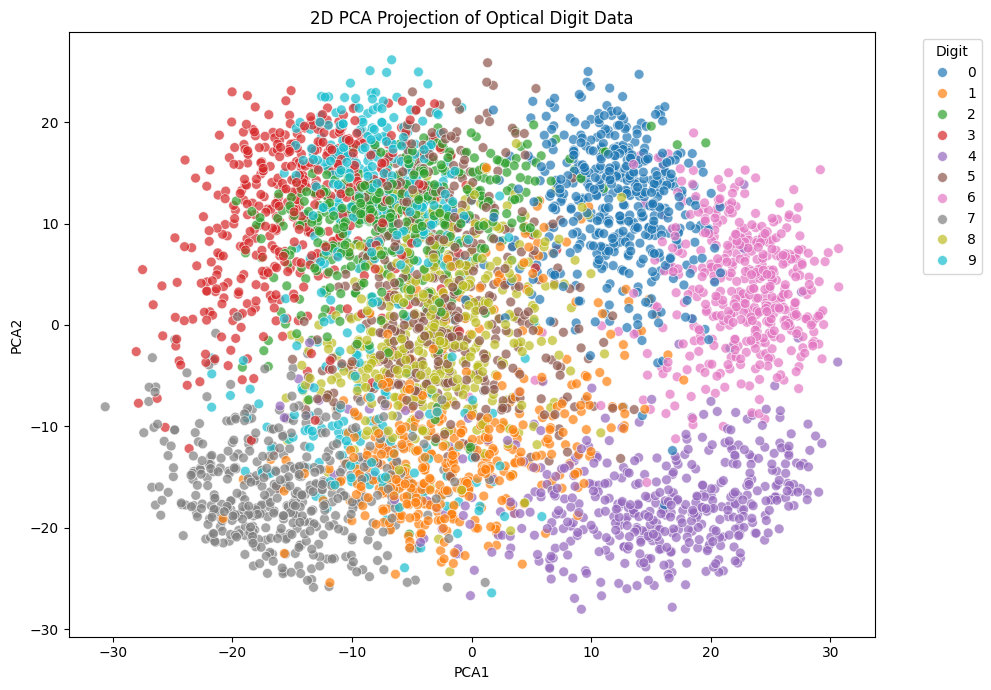

In [58]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=plot_df, x='PCA1', y='PCA2', hue='Digit', palette='tab10', s=50, alpha=0.7)
plt.title("2D PCA Projection of Optical Digit Data")
plt.legend(title='Digit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()